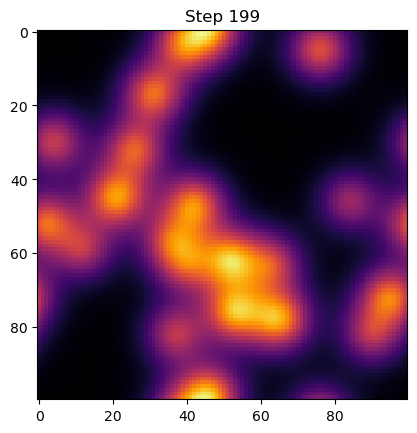

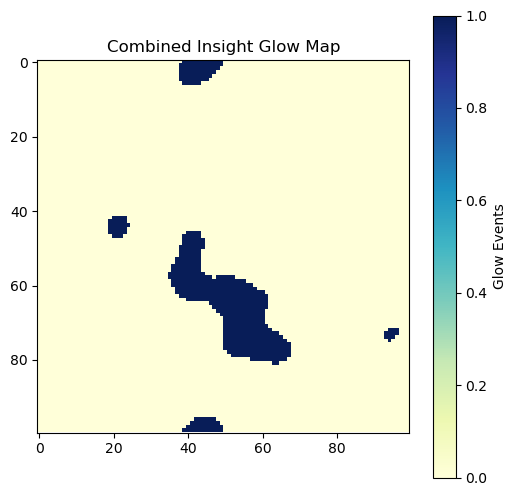

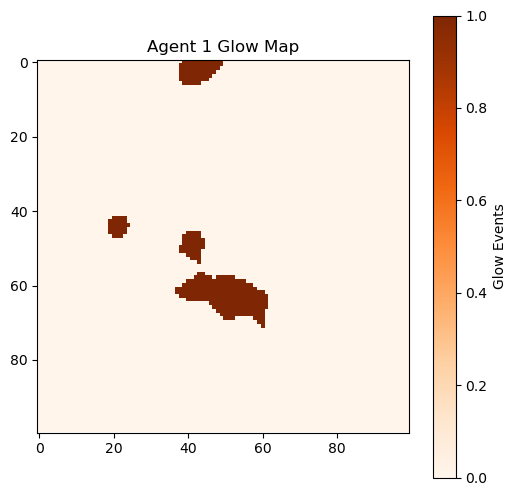

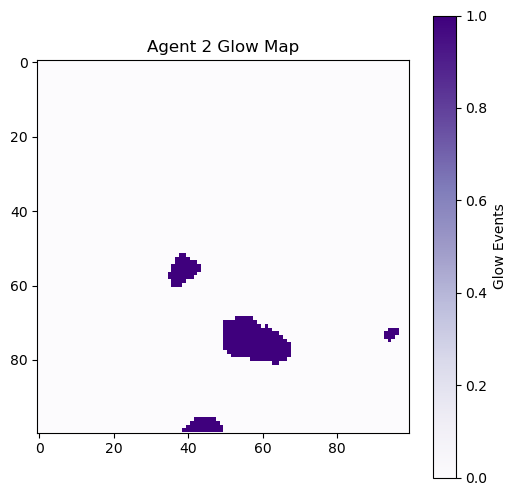

In [1]:
# 🧠 Simulation: Collaborative Learning Patchfield
# ------------------------------------------------------------
# Two curious agents learn in the same relational field.
# Their curiosity seeds activate regions, memory reinforces,
# and insight emerges via patch convergence and resonance.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# --- Parameters ---
grid_size = 100
steps = 200
alpha = 0.2     # curiosity diffusion
beta = 0.1      # memory strength
decay = 0.01    # forgetting
glow_threshold = 2.5

# --- Initialize Field and Glow Maps ---
R = np.zeros((steps, grid_size, grid_size))
glow_map_total = np.zeros((grid_size, grid_size))
glow_map_agent1 = np.zeros((grid_size, grid_size))
glow_map_agent2 = np.zeros((grid_size, grid_size))

# --- Agent 1 Seeds ---
np.random.seed(42)
agent1_seeds = np.random.choice(grid_size**2, 10, replace=False)
for idx in agent1_seeds:
    x, y = divmod(idx, grid_size)
    R[0, x, y] = np.random.uniform(1, 2)

# --- Agent 2 Seeds ---
np.random.seed(99)
agent2_seeds = np.random.choice(grid_size**2, 10, replace=False)
for idx in agent2_seeds:
    x, y = divmod(idx, grid_size)
    R[0, x, y] += np.random.uniform(1, 2)

# --- Laplacian Function ---
def laplacian(Z):
    return (
        -4 * Z +
        np.roll(Z, 1, axis=0) + np.roll(Z, -1, axis=0) +
        np.roll(Z, 1, axis=1) + np.roll(Z, -1, axis=1)
    )

# --- Simulation Loop ---
for t in range(1, steps):
    current = R[t - 1]
    mem = np.sum(R[:t], axis=0) * beta / t
    diffusion = alpha * laplacian(current)
    
    R[t] = current + diffusion + mem - decay * current

    # Glow tracking
    glow_event = (R[t] > glow_threshold) & (R[t - 1] <= glow_threshold)
    glow_map_total += glow_event

    # For agent tracking: see which seeds are closer
    for x in range(grid_size):
        for y in range(grid_size):
            dist1 = np.min([np.linalg.norm([x - divmod(i, grid_size)[0], y - divmod(i, grid_size)[1]]) for i in agent1_seeds])
            dist2 = np.min([np.linalg.norm([x - divmod(i, grid_size)[0], y - divmod(i, grid_size)[1]]) for i in agent2_seeds])
            if dist1 < dist2:
                glow_map_agent1[x, y] += glow_event[x, y]
            else:
                glow_map_agent2[x, y] += glow_event[x, y]

# --- Animation Setup ---
fig, ax = plt.subplots()
im = ax.imshow(R[0], cmap='inferno', vmin=0, vmax=glow_threshold + 1)
plt.title("Collaborative Learning Patchfield")

def update(frame):
    im.set_array(R[frame])
    ax.set_title(f"Step {frame}")
    return [im]

ani = animation.FuncAnimation(fig, update, frames=steps, interval=80, blit=True)

# Save animation
ani.save("collaborative_patchfield_evolution.gif", writer='pillow', fps=10)
plt.show()

# --- Save Glow Maps ---
# Total glow
plt.figure(figsize=(6, 6))
plt.imshow(glow_map_total, cmap='YlGnBu')
plt.title("Combined Insight Glow Map")
plt.colorbar(label="Glow Events")
plt.savefig("collaborative_glow_map_total.png", dpi=300)
plt.show()

# Agent 1
plt.figure(figsize=(6, 6))
plt.imshow(glow_map_agent1, cmap='Oranges')
plt.title("Agent 1 Glow Map")
plt.colorbar(label="Glow Events")
plt.savefig("collaborative_glow_map_agent1.png", dpi=300)
plt.show()

# Agent 2
plt.figure(figsize=(6, 6))
plt.imshow(glow_map_agent2, cmap='Purples')
plt.title("Agent 2 Glow Map")
plt.colorbar(label="Glow Events")
plt.savefig("collaborative_glow_map_agent2.png", dpi=300)
plt.show()
